In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(X_train , y_train),(X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

50000 - Training Örneği <br>
32x32 - Görsel Boyutları <br>
3 - RGB

In [16]:
X_test.shape

(10000, 32, 32, 3)

10000 - Test Örneği <br>
32x32 - Görsel Boyutları <br>
3 - RGB

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
classes[0]

'airplane'

In [21]:
def gorsel_goster(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

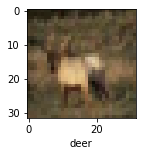

In [22]:
gorsel_goster(X_train, y_train, 3)

RGB kanalı 3 bölümden oluşur. R(kırmızı), G(yeşil) ve B(mavi).<br>
Bu üç ayrı kanalın her biri 0 ile 255 arası bir değer alabilir ve böylece <br>
renkler oluşturulur.<br>
Verisetimizdeki her bir gorselin değerlerini 255'e bölersek, 0 ile 1<br> arasında normalizasyon yapmış oluruz.

In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history1 = cnn.fit(X_train, y_train, epochs=100, steps_per_epoch = 50, batch_size = 3)

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 2.3162 - accuracy: 0.1200
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2983 - accuracy: 0.0933
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2778 - accuracy: 0.1600
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2436 - accuracy: 0.1800
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 2.2336 - accuracy: 0.1200
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 2.1498 - accuracy: 0.1600
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 2.1547 - accuracy: 0.2467
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 2.1183 - accuracy: 0.1800
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 2.1128 - accuracy: 0.1533
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 2.1221 - accuracy: 0.2200
Epoch 11/

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5071 - accuracy: 0.4439: 0s - loss: 1.5052 - accuracy: 


[1.5070774555206299, 0.4438999891281128]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.42093757e-02, 2.05363352e-02, 1.02000117e-01, 4.52514589e-01,
        4.48653661e-02, 1.48441106e-01, 3.79784070e-02, 4.40853834e-02,
        1.19218983e-01, 1.61502641e-02],
       [9.50297806e-03, 6.87898636e-01, 2.46850977e-04, 3.33523203e-04,
        5.47318719e-04, 2.03422333e-05, 2.34327672e-04, 1.64016819e-04,
        1.58853158e-01, 1.42198965e-01],
       [8.84266198e-02, 3.48226577e-01, 1.70814674e-02, 2.04881318e-02,
        1.71994641e-02, 4.95366985e-03, 1.15356445e-02, 1.09788040e-02,
        2.80276626e-01, 2.00833023e-01],
       [6.83930516e-02, 9.42807347e-02, 3.54099227e-03, 1.43081986e-03,
        2.77194357e-03, 1.08096683e-04, 6.13887620e-04, 4.37786570e-04,
        7.78652191e-01, 4.97704260e-02],
       [6.76082214e-03, 2.70181592e-03, 1.30349353e-01, 3.49817425e-01,
        1.27694264e-01, 2.22330198e-01, 8.30499455e-02, 6.85855523e-02,
        6.21005055e-03, 2.50055688e-03]], dtype=float32)

In [31]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 1, 1, 8, 3]

In [32]:

y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
print("Sınıflandırma Sonucu : \n" , classification_report(y_test , y_classes))

Sınıflandırma Sonucu : 
               precision    recall  f1-score   support

           0       0.58      0.25      0.35      1000
           1       0.52      0.76      0.62      1000
           2       0.42      0.21      0.28      1000
           3       0.26      0.46      0.33      1000
           4       0.43      0.28      0.34      1000
           5       0.39      0.31      0.35      1000
           6       0.58      0.40      0.47      1000
           7       0.45      0.63      0.52      1000
           8       0.46      0.72      0.56      1000
           9       0.57      0.41      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.43     10000
weighted avg       0.47      0.44      0.43     10000



<Figure size 432x288 with 0 Axes>

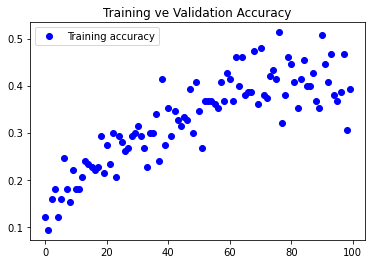

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training ve Validation Accuracy')
plt.legend()
plt.figure()